# Session 27

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.18.5
pandas version :  1.0.5
seaborn version :  0.10.1


In [2]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Missing Data

In [3]:
data = pd.read_csv('data/titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data_missing_value = data.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(data))*100,2)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,Cabin,687,77.10
1,Age,177,19.87
2,Embarked,2,0.22


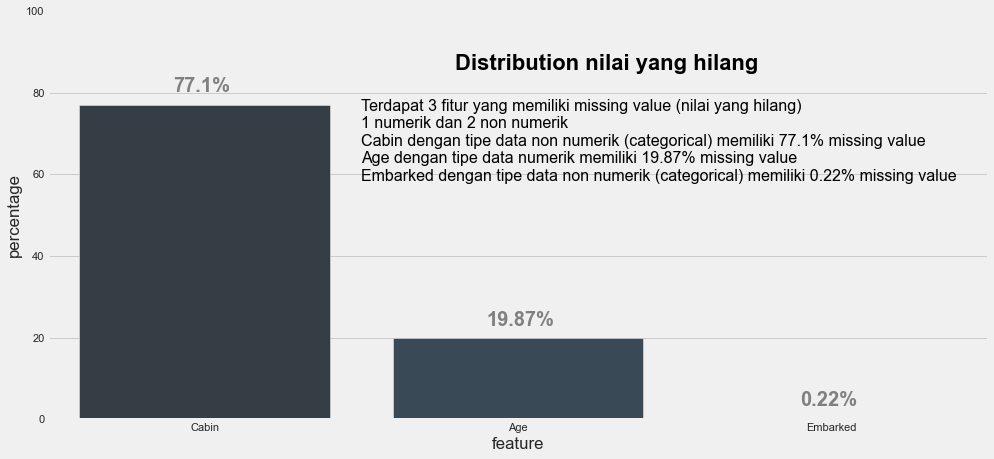

In [7]:
fig, ax = plt.subplots(figsize=(15,7))

g = sns.barplot(x = 'feature',y='percentage',data=data_missing_value,ax=ax, 
               palette=sns.color_palette("Blues_d", n_colors=13, desat=1))

x = np.arange(len(data_missing_value['feature']))
y = data_missing_value['percentage']

for i, v in enumerate(y):
    ax.text(x[i]- 0.1, v+3, str(v)+'%', fontsize = 20, color='gray', fontweight='bold')
    
title = '''
Distribution nilai yang hilang
'''
ax.text(0.8,80,title,horizontalalignment='left',color='black',fontsize=22,fontweight='bold')
    

text = '''
Terdapat 3 fitur yang memiliki missing value (nilai yang hilang)
1 numerik dan 2 non numerik
Cabin dengan tipe data non numerik (categorical) memiliki 77.1% missing value
Age dengan tipe data numerik memiliki 19.87% missing value
Embarked dengan tipe data non numerik (categorical) memiliki 0.22% missing value

'''
ax.text(0.5,50,text,horizontalalignment='left',color='black',fontsize=16,fontweight='normal')
    
ax.set_ylim(0,100)

ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.tight_layout

plt.savefig('fig/Distribution nilai yang hilang.png')

**Drop Cabin**

In [8]:
data = data.drop(['Cabin'], axis=1)

In [9]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

**Drop Embarked**

In [10]:
data = pd.read_csv('data/titanic_train.csv')

In [11]:
# # Hapus semua baris yang memiliki nilai yang hilang
# data = data.dropna()

# Hapus baris dari fitur yang memiliki nilai yang hilang
data = data.dropna(subset=['Embarked'])

# # Hapus semua baris yang memiliki nilai yang hilang
# data.dropna(inplace=True) 

# # Hapus baris dari fitur yang memiliki nilai yang hilang
# data.dropna(subset=['Embarked'], inplace=True)

**Fillna Age**

In [12]:
data = data.fillna(data.mean())
data = data.fillna(data.min())
data = data.fillna(data.max())
data = data.fillna(0)

In [13]:
## 1
data.fillna(data.mean(), inplace=True)

In [14]:
## 2
data['Age'].fillna(data['Age'].mean(), inplace=True)

data = data['Age'].fillna(data['Age'].mean(), inplace=True)

**Fillna Embarked**

In [15]:
data = pd.read_csv('data/titanic_train.csv')

**Nilai Konstan**

In [16]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
data['Embarked'] = data['Embarked'].fillna('Other')

In [18]:
data['Embarked'].value_counts()

S        644
C        168
Q         77
Other      2
Name: Embarked, dtype: int64

In [19]:
data = pd.read_csv('data/titanic_train.csv')

**Modus pada kolom**

In [20]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [22]:
data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

# Duplicated Data

In [23]:
# List of Tuples
hotel_dataset = [
            ('arif',  'hotel jakarta',   5),
            ('adam',  'hotel bandung',   4),
            ('adam',  'hotel bandung',   5),
            ('fiqry', 'hotel surbaya',   3),
            ('rezky', 'hotel garut',   1),
            ('rezky', 'hotel garut',   1),
            ('robert','hotel semarang', 2),
            ('robert','hotel semarang', 2),
            ('deni',  'hotel bogor', 5),
            ('deni',  'hotel bogor', 3)
        ]

# Create a DataFrame object
data_hotel= pd.DataFrame(hotel_dataset, columns=['user','hotel', 'rating'])
data_hotel

,user,hotel,rating
0,arif,hotel jakarta,5
1,adam,hotel bandung,4
2,adam,hotel bandung,5
3,fiqry,hotel surbaya,3
4,rezky,hotel garut,1
5,rezky,hotel garut,1
6,robert,hotel semarang,2
7,robert,hotel semarang,2
8,deni,hotel bogor,5
9,deni,hotel bogor,3


In [24]:
data_hotel.duplicated().sum()

2

In [25]:
data_hotel.duplicated(subset=['user','hotel']).sum()

4

In [26]:
data_hotel = data_hotel.drop_duplicates()
data_hotel

,user,hotel,rating
0,arif,hotel jakarta,5
1,adam,hotel bandung,4
2,adam,hotel bandung,5
3,fiqry,hotel surbaya,3
4,rezky,hotel garut,1
6,robert,hotel semarang,2
8,deni,hotel bogor,5
9,deni,hotel bogor,3


In [27]:
data_hotel = data_hotel.drop_duplicates(subset=['user','hotel'])
data_hotel

,user,hotel,rating
0,arif,hotel jakarta,5
1,adam,hotel bandung,4
3,fiqry,hotel surbaya,3
4,rezky,hotel garut,1
6,robert,hotel semarang,2
8,deni,hotel bogor,5


# Outlier

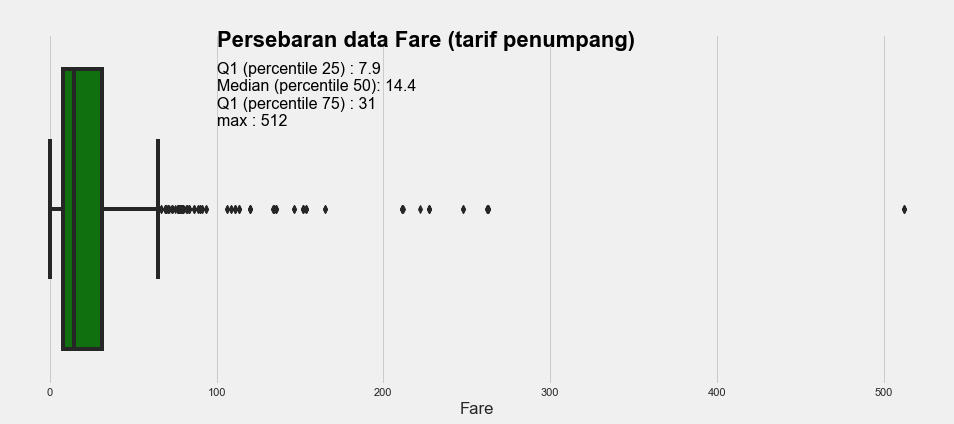

In [28]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(data['Fare'],color='green',orient='h')

title = '''
Persebaran data Fare (tarif penumpang)
'''
ax.text(100,-0.4,title,horizontalalignment='left',color='black',fontsize=22,fontweight='bold')

text = '''
Q1 (percentile 25) : 7.9
Median (percentile 50): 14.4
Q1 (percentile 75) : 31
max : 512

'''
ax.text(100,-0.14,text,horizontalalignment='left',color='black',fontsize=16,fontweight='normal')

plt.tight_layout

plt.savefig('fig/Fare boxplot.png')
    

In [29]:
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [30]:
Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((data['Fare'] >= low_limit) & (data['Fare'] <= high_limit))
data = data[filtered_entries]

In [31]:
data.shape

(775, 12)

In [32]:
data = pd.read_csv('data/titanic_train.csv')

In [33]:
# data['Fare'] = np.log1p(data['Fare'])

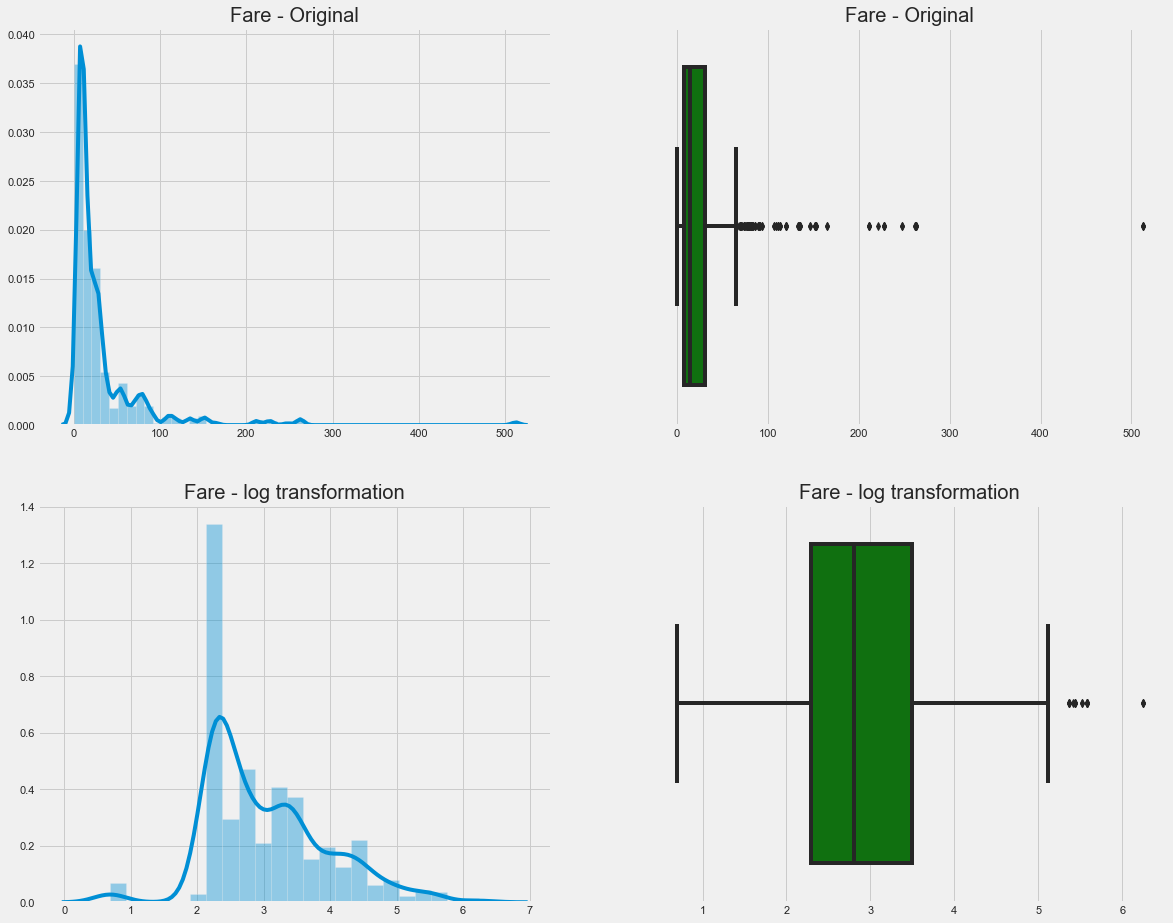

In [34]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data['Fare'],kde=True, ax=ax[0,0])
ax[0,0].set_title('Fare - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data['Fare'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('Fare - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data['Fare']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('Fare - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data['Fare']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('Fare - log transformation')
ax[1,1].set_xlabel('')

plt.savefig('fig/Fare log transformation.png')

# Normalization/ Standardization

In [35]:
data = pd.read_csv('data/titanic_train.csv')

In [36]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
data['Fare_norm'] = MinMaxScaler().fit_transform(data['Fare'].values.reshape(len(data), 1))
data['Fare_std'] = StandardScaler().fit_transform(data['Fare'].values.reshape(len(data), 1))

In [37]:
data[['Fare','Fare_norm','Fare_std']].describe()

,Fare,Fare_norm,Fare_std
count,891.000000,891.000000,8.910000e+02
mean,32.204208,0.062858,-4.373606e-17
std,49.693429,0.096995,1.000562e+00
min,0.000000,0.000000,-6.484217e-01
25%,7.910400,0.015440,-4.891482e-01
50%,14.454200,0.028213,-3.573909e-01
75%,31.000000,0.060508,-2.424635e-02
max,512.329200,1.000000,9.667167e+00


Text(0.5, 0, '')

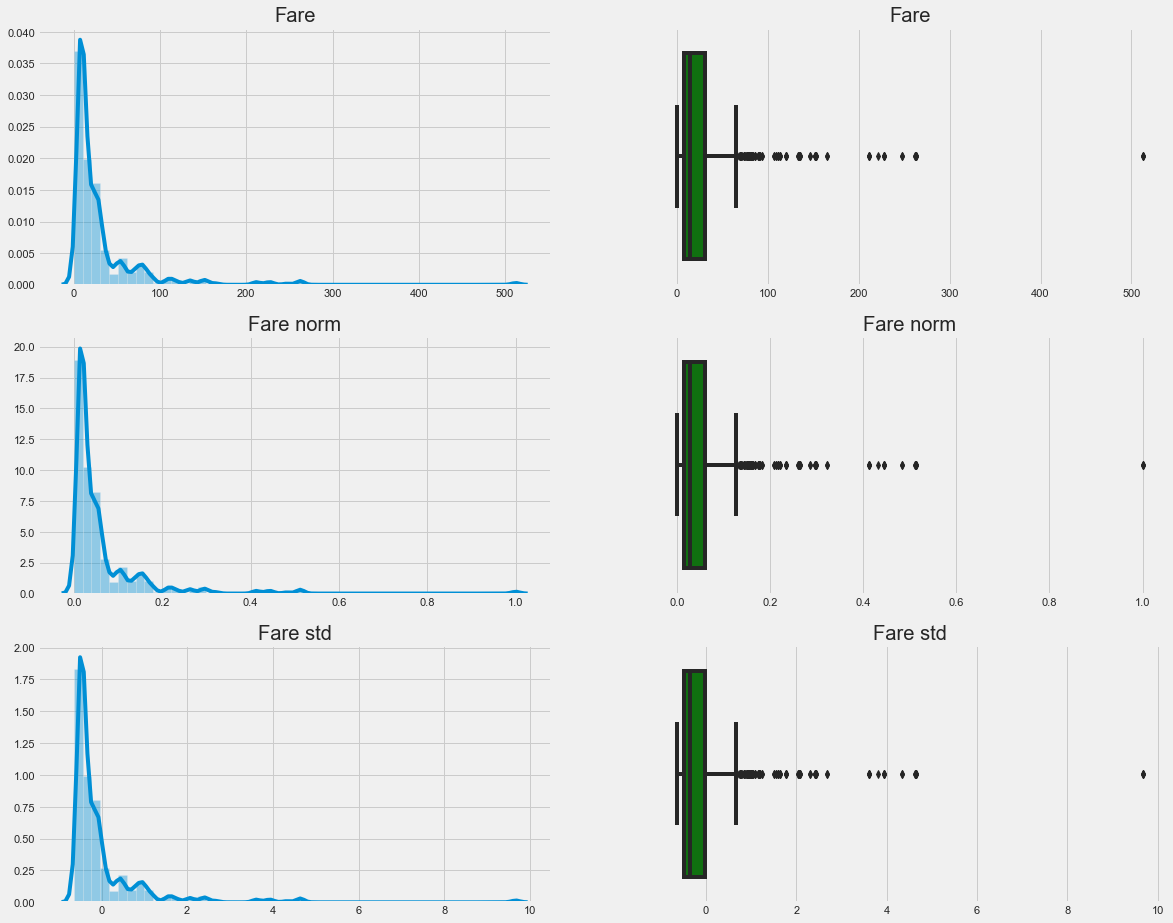

In [38]:
f,ax = plt.subplots(3,2,figsize=(18,15))

g = sns.distplot(data['Fare'],kde=True, ax=ax[0,0])
ax[0,0].set_title('Fare')
ax[0,0].set_xlabel('')

g = sns.boxplot(data['Fare'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('Fare')
ax[0,1].set_xlabel('')

g = sns.distplot(data['Fare_norm'],kde=True, ax=ax[1,0])
ax[1,0].set_title('Fare norm')
ax[1,0].set_xlabel('')

g = sns.boxplot(data['Fare_norm'],color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('Fare norm')
ax[1,1].set_xlabel('')

g = sns.distplot(data['Fare_std'],kde=True, ax=ax[2,0])
ax[2,0].set_title('Fare std')
ax[2,0].set_xlabel('')

g = sns.boxplot(data['Fare_std'],color='green',orient='h', ax=ax[2,1])
ax[2,1].set_title('Fare std')
ax[2,1].set_xlabel('')




# Feature Encoding

In [39]:
data = pd.read_csv('data/titanic_train.csv')
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
# data = data[['Survived','Pclass','Fare','Sex']]
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [41]:
168/len(data)

0.18855218855218855

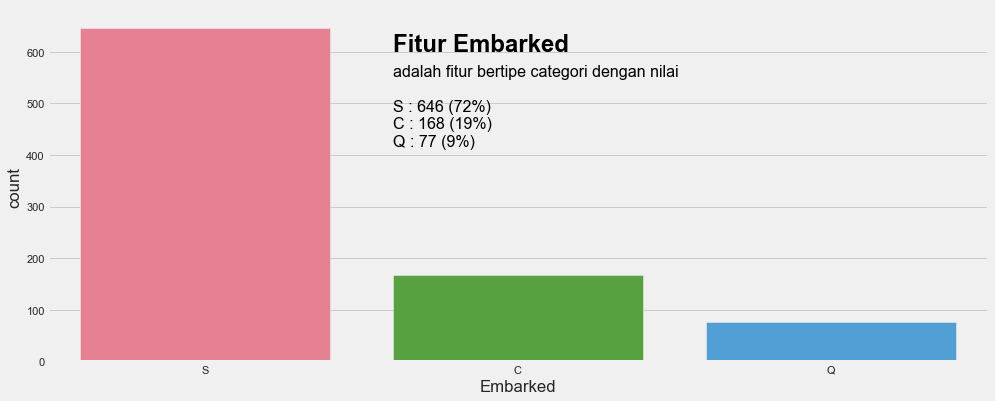

In [42]:
fig, ax = plt.subplots(figsize=(15,6))
g = sns.countplot('Embarked',data=data,palette='husl')

title = '''
Fitur Embarked
'''
ax.text(0.6,550,title,horizontalalignment='left',color='black',fontsize=24,fontweight='bold')

text = '''
adalah fitur bertipe categori dengan nilai

S : 646 (72%)
C : 168 (19%)
Q : 77 (9%)

'''
ax.text(0.6,350,text,horizontalalignment='left',color='black',fontsize=16,fontweight='normal')

plt.tight_layout

plt.savefig('fig/Embarked countplot.png')
    

## Label Encoding

In [43]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(data['Embarked'])
data['Embarked_Label_Encoding'] = le.transform(data['Embarked']) 

In [44]:
Embarked_Label_Encoding = data[['PassengerId','Embarked','Embarked_Label_Encoding',]]
Embarked_Label_Encoding.head()

,PassengerId,Embarked,Embarked_Label_Encoding
0,1,S,2
1,2,C,0
2,3,S,2
3,4,S,2
4,5,S,2


In [45]:
Embarked_Label_Encoding.groupby(['Embarked','Embarked_Label_Encoding'])['PassengerId'].count()

Embarked  Embarked_Label_Encoding
C         0                          168
Q         1                           77
S         2                          646
Name: PassengerId, dtype: int64

## One Hot Encoding

In [46]:
data = pd.read_csv('data/titanic_train.csv')
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [47]:
dummies_Embarked = pd.get_dummies(data['Embarked'],prefix='Embarked')
data = pd.concat([data, dummies_Embarked], axis=1)
data[['Embarked','Embarked_C','Embarked_Q','Embarked_S']].head()

,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,S,0,0,1
1,C,1,0,0
2,S,0,0,1
3,S,0,0,1
4,S,0,0,1


# Class Imbalance

In [48]:
#List of Tuples
students = [('jack', 80, 'A'),
            ('Riti', 90, 'A'),
            ('Deni', 90, 'A'),
            ('Adam', 85, 'A'),
            ('Sume', 79, 'A'),
            ('Roy', 81, 'A'),
            ('Aadi', 88, 'A'),
            ('Sachin', 90, 'A'),
            ('Ninggar', 90, 'A'),
            ('Sari', 90, 'A'),
            ('Robert', 85, 'A'),
            ('Adi', 79, 'A'),
            
            ('Loli', 50, 'B'),
            ('Gos', 12, 'B'),
            ('Putri', 50, 'B'),
            ('Sneha', 12, 'B'),
            ('Ibet', 50, 'B'),
            ('Adit', 12, 'B')
        ]


# Create a DataFrame object
data_students = pd.DataFrame(students, columns=['Name', 'GPA', 'Class'])
data_students = data_students.drop_duplicates()
data_students

,Name,GPA,Class
0,jack,80,A
1,Riti,90,A
2,Deni,90,A
3,Adam,85,A
4,Sume,79,A
5,Roy,81,A
6,Aadi,88,A
7,Sachin,90,A
8,Ninggar,90,A
9,Sari,90,A


In [49]:
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,10))
# g = sns.countplot('Class',data=data_students,palette='husl')
# ax.set_title('Distribusi Class')

In [50]:
from imblearn import under_sampling, over_sampling

X = data_students.drop(['Class'],axis=1)
y = data_students['Class']

# Undersampling
X_under, y_under = under_sampling.RandomUnderSampler().fit_resample(X, y)

# Overampling
X_over, y_over = over_sampling.RandomOverSampler().fit_resample(X, y)


In [51]:
print(pd.Series(y).value_counts())

A    12
B     6
Name: Class, dtype: int64


In [52]:
print(pd.Series(y_under).value_counts())

A    6
B    6
Name: Class, dtype: int64


In [53]:
print(pd.Series(y_over).value_counts())

A    12
B    12
Name: Class, dtype: int64


In [54]:
y_over = y_over.to_frame()
y_over.head(2)

,Class
0,A
1,A


In [55]:
data_students_over = pd.concat([X_over, y_over], axis=1)
data_students_over

,Name,GPA,Class
0,jack,80,A
1,Riti,90,A
2,Deni,90,A
3,Adam,85,A
4,Sume,79,A
5,Roy,81,A
6,Aadi,88,A
7,Sachin,90,A
8,Ninggar,90,A
9,Sari,90,A


In [56]:
data_students_over.duplicated().sum()

6

In [57]:
#List of Tuples
students = [('jack', 80, 'A'),
            ('Riti', 90, 'A'),
            ('Deni', 90, 'A'),
            ('Adam', 85, 'A'),
            ('Sume', 79, 'A'),
            ('Roy', 81, 'A'),
            ('Aadi', 88, 'A'),
            ('Sachin', 90, 'A'),
            ('Ninggar', 90, 'A'),
            ('Sari', 90, 'A'),
            ('Robert', 85, 'A'),
            ('Adi', 79, 'A'),
            
            ('Loli', 50, 'B'),
            ('Gos', 12, 'B'),
            ('Putri', 50, 'B'),
            ('Sneha', 12, 'B'),
            ('Ibet', 50, 'B'),
            ('Adit', 12, 'B')
        ]


# Create a DataFrame object
data_students = pd.DataFrame(students, columns=['Name', 'GPA', 'Class'])
data_students = data_students.drop_duplicates()
data_students['NIM'] = data_students.index
data_students

,Name,GPA,Class,NIM
0,jack,80,A,0
1,Riti,90,A,1
2,Deni,90,A,2
3,Adam,85,A,3
4,Sume,79,A,4
5,Roy,81,A,5
6,Aadi,88,A,6
7,Sachin,90,A,7
8,Ninggar,90,A,8
9,Sari,90,A,9


In [58]:
from imblearn import over_sampling

X = data_students.drop(['Class','Name'],axis=1)
y = data_students['Class']
# Overampling with SMOTE
X_over_smote, y_over_smote = over_sampling.SMOTE().fit_resample(X, y)

In [59]:
data_students_over_smote = pd.concat([X_over_smote, y_over_smote], axis=1)
data_students_over_smote

,GPA,NIM,Class
0,80,0,A
1,90,1,A
2,90,2,A
3,85,3,A
4,79,4,A
5,81,5,A
6,88,6,A
7,90,7,A
8,90,8,A
9,90,9,A


In [60]:
data_students_over_smote.duplicated().sum()

1